# Implementación de SGD para la función XOR

In [209]:
import numpy as np
import matplotlib.pyplot as plt

## Función sigmoidea

In [210]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

## Función de pérdida

In [211]:
def loss(y, y_pred):
  diff = y - y_pred
  return np.mean(diff**2)

## Función de predicción

In [212]:
def predict(x, w, n):
  nx = len(x)
  
  W = np.reshape(w, (nx, n)).T
  z_L1 = x @ W[:, :-1]
  a_L1 = np.append(sigmoid(z_L1), np.array([1]))

  z_L2 = np.dot(a_L1, W[:, -1]) #Prediccion para la i-esima fila del dataset

  return [z_L2, a_L1, z_L1, W]

In [213]:
x=np.array([23, 100, 1])
w=np.arange(9,)
fwd = predict(x,w,3)
print(fwd)

[21.0, array([1., 1., 1.]), array([102, 474]), array([[0, 3, 6],
       [1, 4, 7],
       [2, 5, 8]])]


## Función para calcular el gradiente de la función de perdida respecto a los parámetros del modelo

In [214]:
def gradient(x, err, pred_vars):
  # Derivada de loss respecto a la y_pred
  dL_dypred = -2*err
  z_L2, a_L1, z_L1, W = pred_vars[0], pred_vars[1], pred_vars[2], pred_vars[3]
  
  # Derivada respecto a los parámetros de la capa L2
  dL_w2b2 = dL_dypred*a_L1

  # Derivada respecto a los parámetros de la capa L1
  dypred_da1 = W[0:2, -1]
  da1_dz1 = sigmoid(z_L1)*(1-sigmoid(z_L1))
  dypred_dz1 = dypred_da1*da1_dz1
  dL_w1b1 = dL_dypred*np.tensordot(x, dypred_dz1, axes=0)

  # Gradiente
  gradJ = np.reshape(dL_w1b1.T, (6,)) #Primero debo trasponer para que la salida sea el apilamiento de las columnas de la matriz
  gradJ = np.append(gradJ, dL_w2b2)
  
  return gradJ

In [215]:
gradient(x,.213123,fwd)

array([-0.      , -0.      , -0.      , -0.      , -0.      , -0.      ,
       -0.426246, -0.426246, -0.426246])

## Derivada numerica

In [216]:
def NumDiff(y, y_pred0, x, w):
  nw = len(w)
  w0 = w
  dw = 1e-6
  f0 = loss(y, y_pred0)
  grad = []
  for i in range(nw):
    w = w0
    w[i] = w[i] + dw
    pred = predict(x, w, 3)
    y_pred = pred[0]
    f = loss(y, y_pred)
    df_dw = (f-f0)/dw
    grad.append(df_dw)

  return np.asarray(grad)


In [217]:
NumDiff(0.3, 0.2, x, w)

array([4.2848e+08, 4.2848e+08, 4.2848e+08, 4.2848e+08, 4.2848e+08,
       4.2848e+08, 4.2848e+08, 4.2848e+08, 4.2848e+08])

## Algortimo SGD

In [218]:
def sgd(X, y, w, lr, epochs):
  N, d = X.shape
  MSE = []
  for i in range(epochs):
    y_pred = np.empty((N,))
    for j in range(N):
      # Selecciono fila j del dataset
      x_j = X[j,:]
      # Paso forward utilizando la fila j
      pred_vars = predict(x_j, w, 3)
      y_pred_j = pred_vars[0]
      y_pred[j] = y_pred_j
      # Calculo del residuo
      err_j = y[j] - y_pred_j
      # Paso backpropagation
      gradJ = gradient(x_j, err_j, pred_vars)
      # Derivada numérica
      gradJ2 = NumDiff(y, y_pred_j, x_j, w)
      # Comparacion backprop y derivada numerica
      print("Derivada computada por backpropagation:", gradJ)
      print("Derivada computada por diferencias finitas:", gradJ2)
      # Actualizacion de pesos
      w = w - lr*gradJ
    mse = loss(y, y_pred)
    MSE.append(mse)
    print("Epoch:", i, "MSE:", mse)

  return w, MSE

## Main - Minimización utilizando SGD en el problema de ajuste a la función XOR

In [219]:
# Dataset
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

N, d = X.shape

# Agrego columna de unos
X = np.append(X, np.ones((N,1)), axis=1)

# Variable target
y = np.array([0, 1, 1, 0])

# Arquitectura de la ANN
n_layers = 2
neuronas_L1 = 2
neuronas_L2 = 1

# Hiperparámetros del modelo
learningRates = [0.01, 0.1, 1, 5, 10] # Learning rate
epochs = 100 # N° de iteraciones máximas de SGD

# Inicializacion random de los parámetros del modelo
n_param = 9
w0 = np.random.rand(n_param)

# Llamada al algoritmo de Stochastic Gradient Descent
w, MSE = sgd(X, y, w0, 0.01, epochs)

#for lr in learningRates:
   #w, MSE = sgd(X, y, lr, epochs)

Derivada computada por backpropagation: [0.         0.         0.0030302  0.         0.         0.02373368
 0.33760694 0.38049555 0.52707877]
Derivada computada por diferencias finitas: [ 0.          0.         -0.00271884 -0.00271884 -0.00271884 -0.02401387
 -0.32693121 -0.66832928 -1.14124668]
Derivada computada por backpropagation: [-0.         -0.0062392  -0.0062392  -0.         -0.04063265 -0.04063265
 -1.09187748 -1.16155502 -1.36887351]
Derivada computada por diferencias finitas: [ 0.         -0.00168129 -0.00336258 -0.00336258 -0.01431195 -0.02526131
 -0.31949143 -0.63249626 -1.00136534]
Derivada computada por backpropagation: [-0.00700042 -0.         -0.00700042 -0.04972565 -0.         -0.04972565
 -1.07131081 -1.09320964 -1.35245031]
Derivada computada por diferencias finitas: [-0.00182432 -0.00182432 -0.00364864 -0.0166072  -0.0166072  -0.02956575
 -0.3087501  -0.59364    -0.94608594]
Derivada computada por backpropagation: [0.00239918 0.00239918 0.00239918 0.0158977  0.0158

In [220]:
# Comparacion parametros originales vs parametros ajustados
print("Parámetros originales:", w)
print("Parámetros aprendidos:", w0)

# Prediccion
y_pred = []
for i in range(N):
  pred_i = predict(X[i, :], w, 3)
  y_pred_i = pred_i[0]
  y_pred.append(y_pred_i)

print("Salida real:", y.flatten())
print("Predicción:", y_pred)

Parámetros originales: [0.76035544 0.79388414 0.57856143 0.48512033 0.76799157 0.95749436
 0.05659162 0.29135982 0.21251269]
Parámetros aprendidos: [0.76008148 0.79398063 0.57764294 0.48467865 0.76910916 0.95388221
 0.0249694  0.22428938 0.08563484]
Salida real: [0 1 1 0]
Predicción: [0.4593153866847966, 0.5049762215161829, 0.49301997382612756, 0.525681326578068]


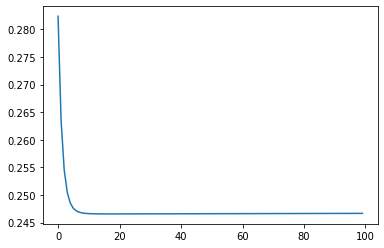

In [221]:
# Grafica
plt.plot(np.arange(epochs), MSE)
plt.show()